<a href="https://colab.research.google.com/github/Hemanthemu1852/Adas_Blind_Spot_detection/blob/main/Copy_of_train_val_pred_mp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!python -m pip install --upgrade pip
!pip install ultralytics==8.0.20
!pip install roboflow --quiet
!pip install pycuda
!pip install opencv-python
!pip install tensorflow
!pip install opencv-python
!pip install pygame

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.2/261.2 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 92.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 86.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6

In [3]:
#SET HOME DIRECTORY
import os
HOME = os.getcwd()
print(HOME)

/content


In [4]:
#IMPORTING ULTRALYTICS YoloV8

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

from ultralytics import YOLO

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.2/78.2 GB disk)


In [ ]:
#IMPORTING CUSTOM DATASET FROM ROBOFLOW
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from roboflow import Roboflow
rf = Roboflow(api_key="ihp1iiXBRQH7I5WxRIJH")                 #ENTER YOUR ROBOFLOW API KEY
project = rf.workspace("dayananda-sagar-university-q7oox").project("object-detection-for-safe-lane-changing")
dataset = project.version(1).download("yolov8")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Object-Detection-for-Safe-Lane-Changing-1 in yolov8:: 100%|██████████| 1340/1340 [00:00<00:00, 7931.61it/s]


In [5]:
#TRAINING
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data={'/content/drive/MyDrive/BS/Adas/datasets/DS/data.yaml'} epochs=25 imgsz=640 plots=True


/content
100% 21.5M/21.5M [00:00<00:00, 227MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/drive/MyDrive/BS/Adas/datasets/DS/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript

In [ ]:
!scp -r '/content/runs/detect/train2/'

usage: scp [-346ABCOpqRrsTv] [-c cipher] [-D sftp_server_path] [-F ssh_config]
           [-i identity_file] [-J destination] [-l limit]
           [-o ssh_option] [-P port] [-S program] source ... target


In [6]:
import os

# List files in the directory
directory = '/content/runs/detect/train'
files = os.listdir(directory)
print("Files in directory:")
for file in files:
    print(file)


Files in directory:
confusion_matrix.png
weights
results.csv
val_batch0_labels.jpg
args.yaml
val_batch1_pred.jpg
F1_curve.png
R_curve.png
P_curve.png
train_batch436.jpg
train_batch435.jpg
val_batch2_labels.jpg
val_batch0_pred.jpg
train_batch0.jpg
val_batch2_pred.jpg
PR_curve.png
results.png
events.out.tfevents.1712403142.e037c3690745.3053.0
val_batch1_labels.jpg
train_batch1.jpg
train_batch437.jpg
train_batch2.jpg


from google.colab import files

# Download a specific file
files.download('/content/runs/detect/train/weights/last.pt')


In [11]:
from google.colab import files

# Download a specific file
files.download('/content/runs/detect/train/weights/last.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
from google.colab import files

# Download a specific file
files.download('/content/runs/detect/train/weights/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
#VALIDATION
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={'/content/drive/MyDrive/BS/Adas/datasets/DS/data.yaml'}

2024-04-06 11:59:11.530142: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-06 11:59:11.530196: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-06 11:59:11.532319: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-06 11:59:13.099242: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/BS/Adas/datasets/DS/valid/labels.cac

In [13]:
#PREDICTION
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={'/content/drive/MyDrive/BS/Adas/datasets/DS/test/images'} save=True

2024-04-06 12:00:55.824467: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-06 12:00:55.824516: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-06 12:00:55.825975: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-06 12:00:56.869521: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
image 1/67 /content/drive/MyDrive/BS/Adas/datasets/DS/test/images/t_0_0_0

In [14]:
from IPython.display import display, Image
import glob

In [15]:
#FILES OBTAINED AFTER TRAINING
!ls runs/detect/train/

args.yaml					    results.png		   val_batch0_pred.jpg
confusion_matrix.png				    train_batch0.jpg	   val_batch1_labels.jpg
events.out.tfevents.1712403142.e037c3690745.3053.0  train_batch1.jpg	   val_batch1_pred.jpg
F1_curve.png					    train_batch2.jpg	   val_batch2_labels.jpg
P_curve.png					    train_batch435.jpg	   val_batch2_pred.jpg
PR_curve.png					    train_batch436.jpg	   weights
R_curve.png					    train_batch437.jpg
results.csv					    val_batch0_labels.jpg


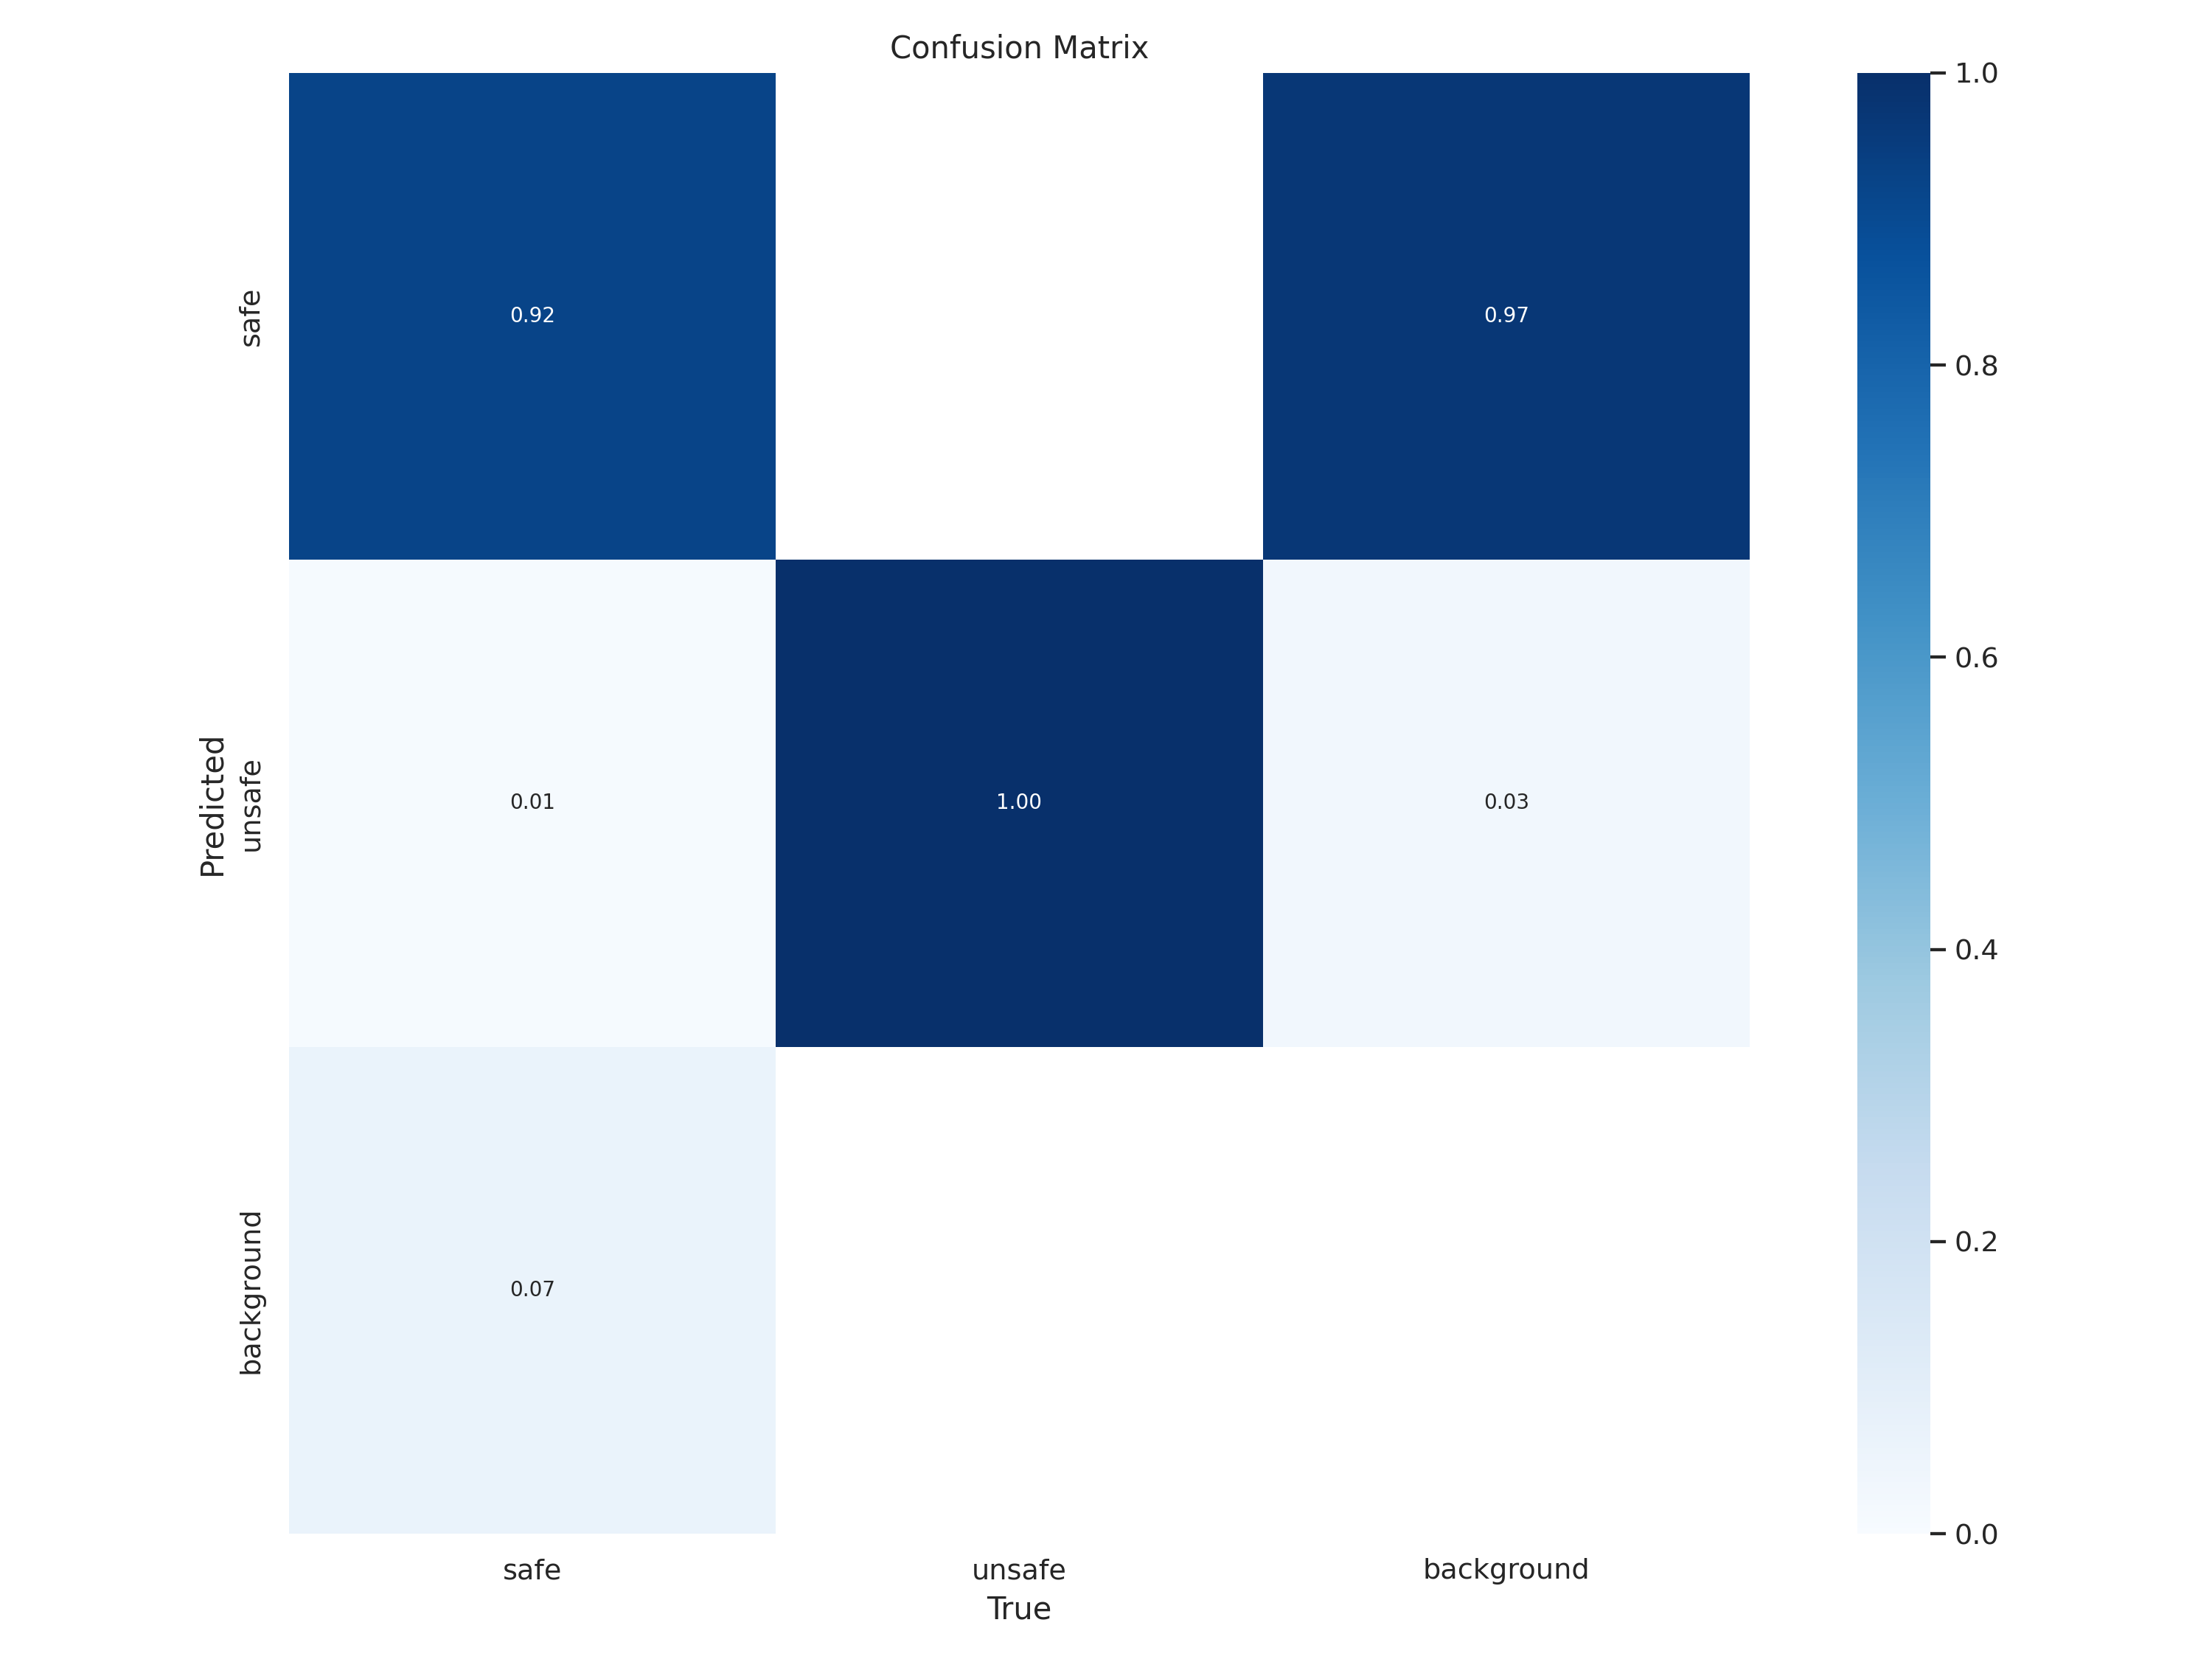

In [16]:
#CONFUSION MATRIX
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

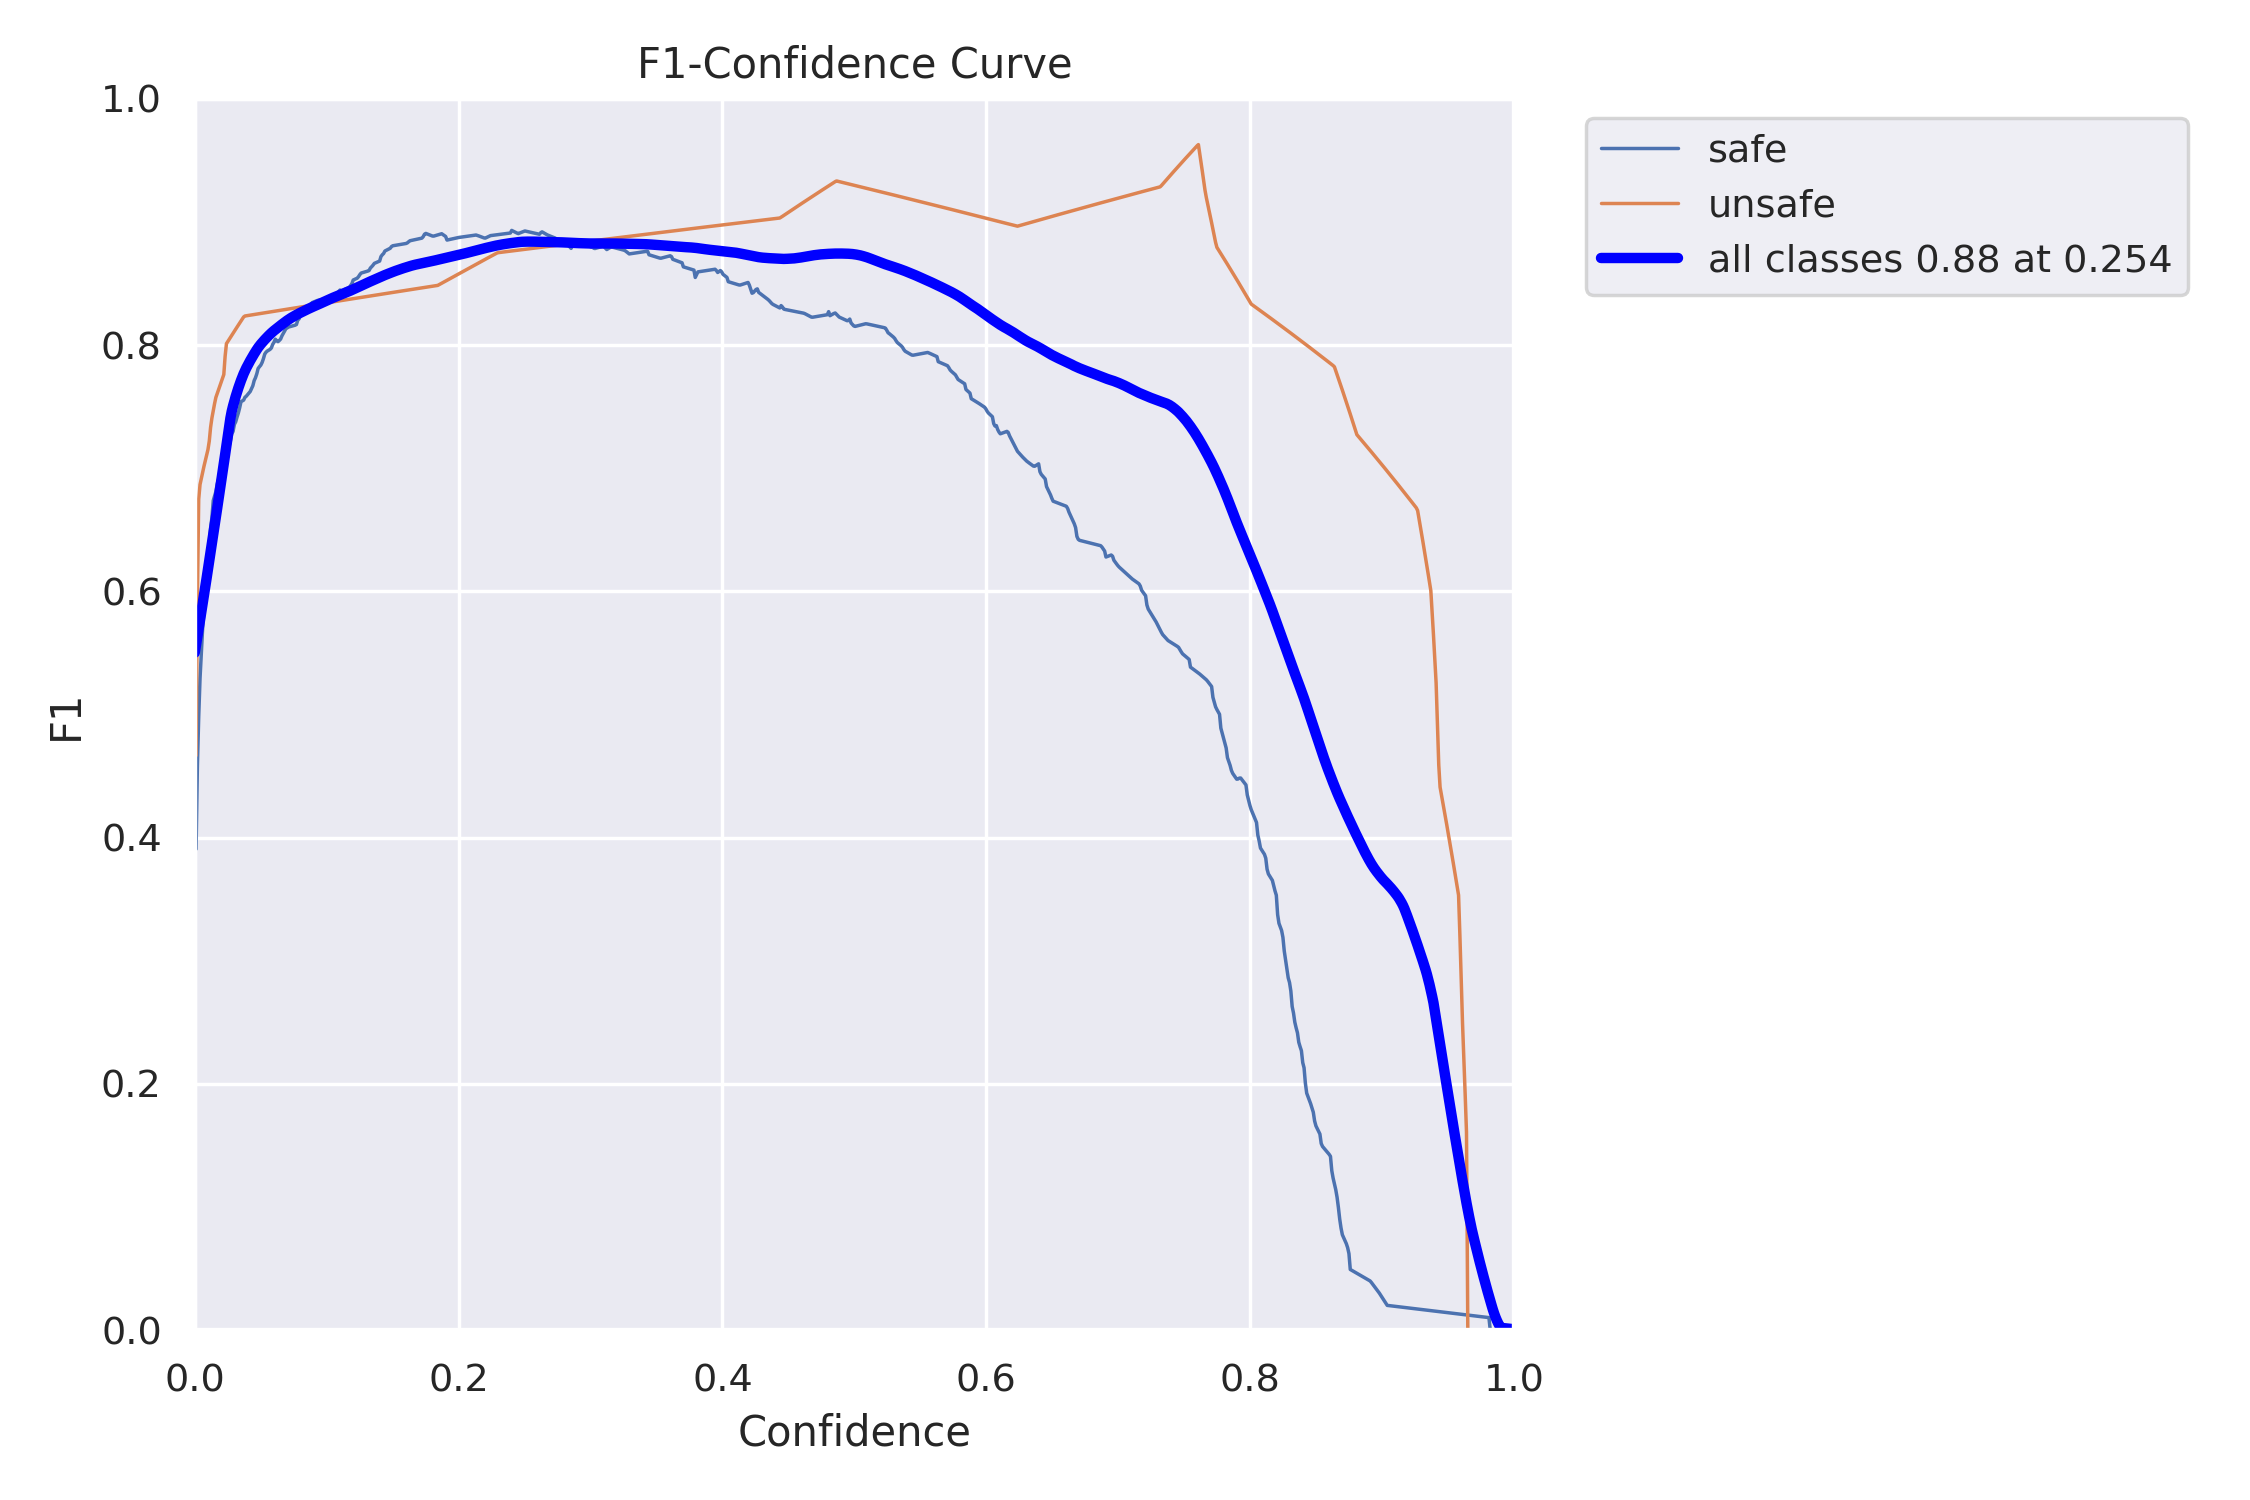

In [17]:
#F1-CURVE
Image(filename=f'{HOME}/runs/detect/train/F1_curve.png', width=600)

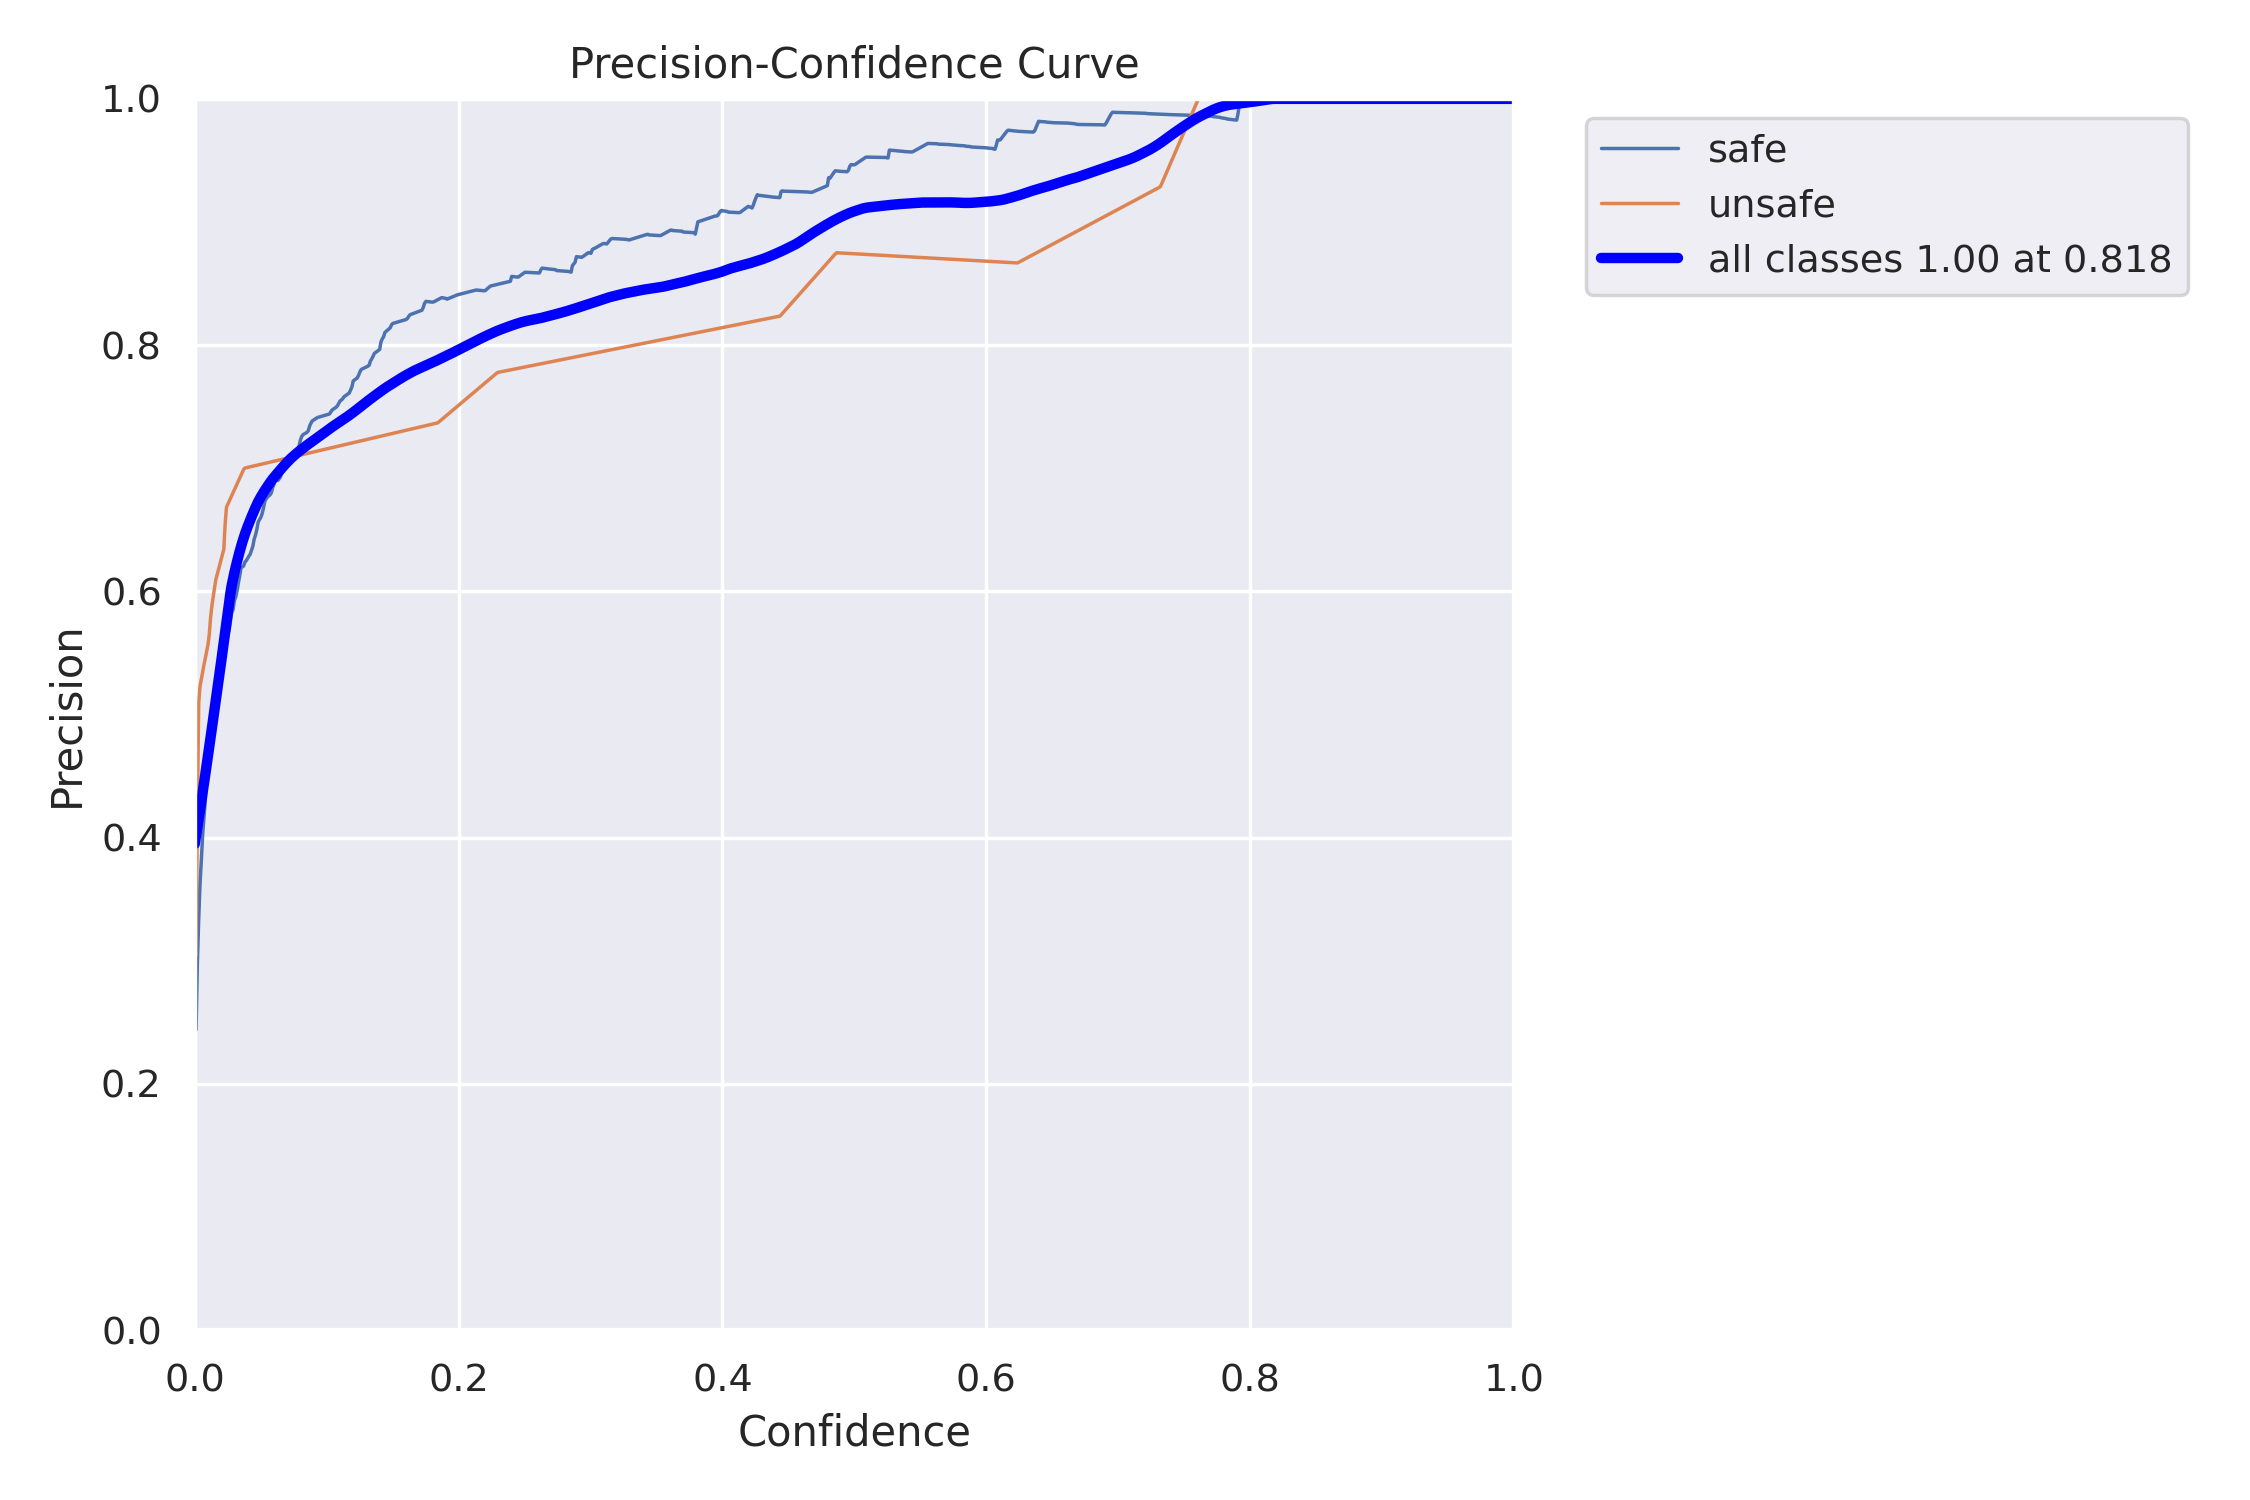

In [18]:
#P-CURVE
Image(filename=f'{HOME}/runs/detect/train/P_curve.png', width=600)

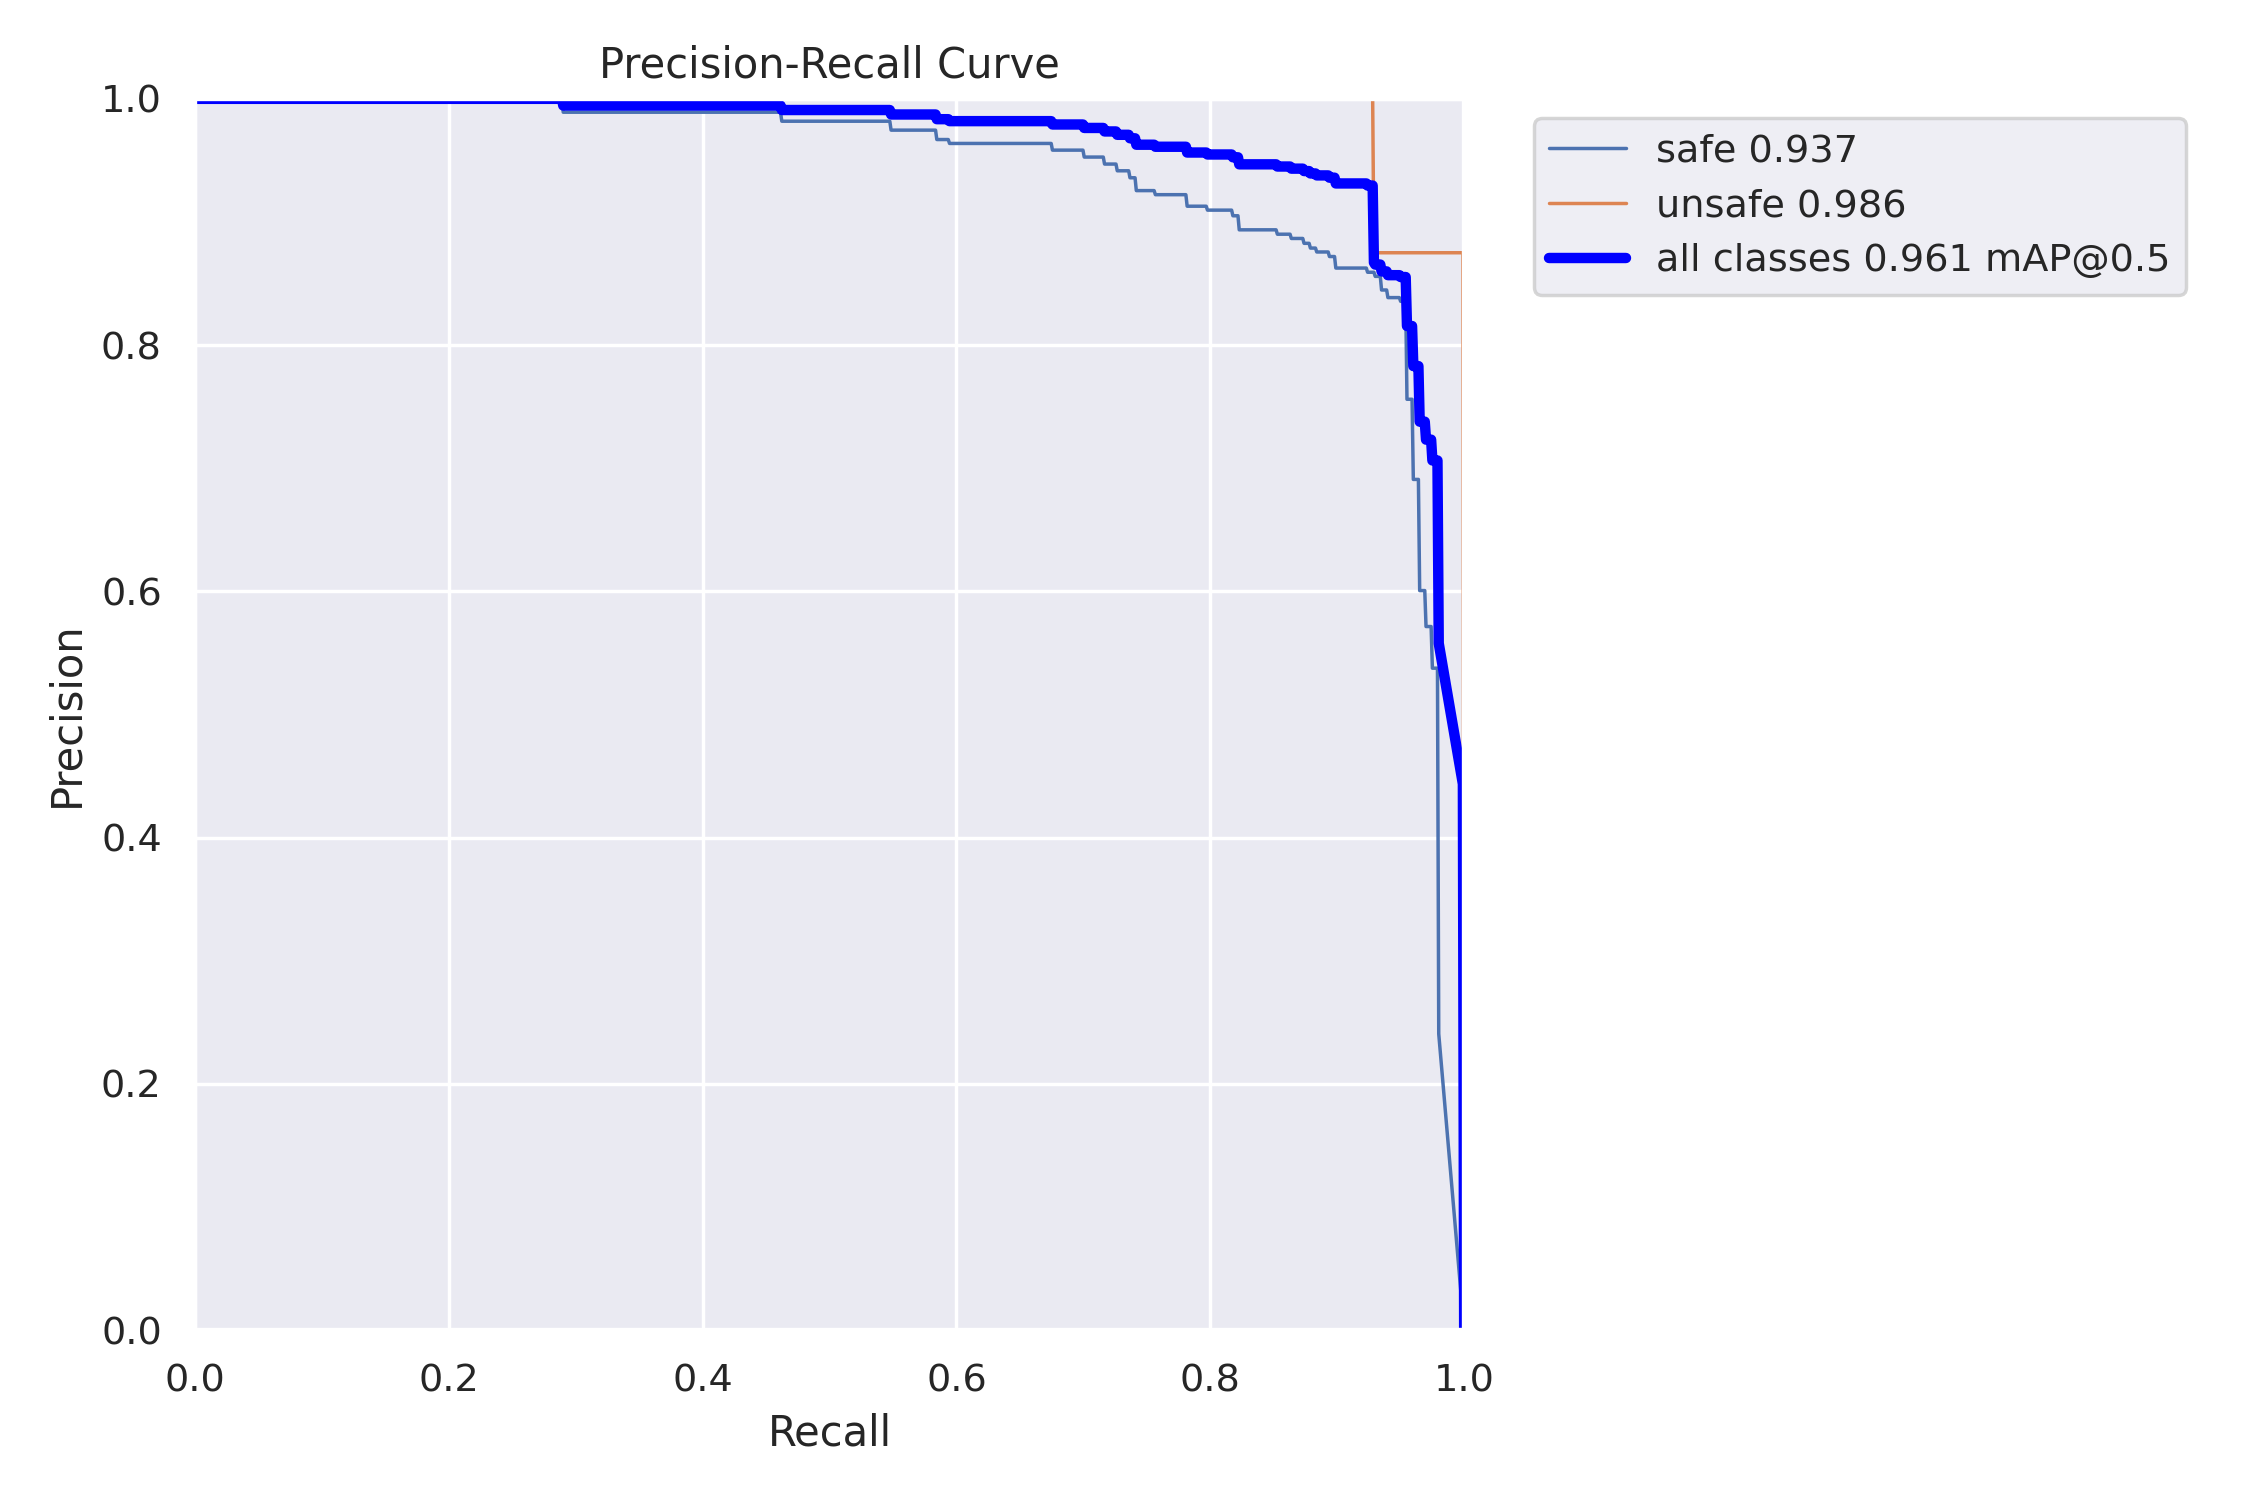

In [19]:
#PR-CURVE
Image(filename=f'{HOME}/runs/detect/train/PR_curve.png', width=600)

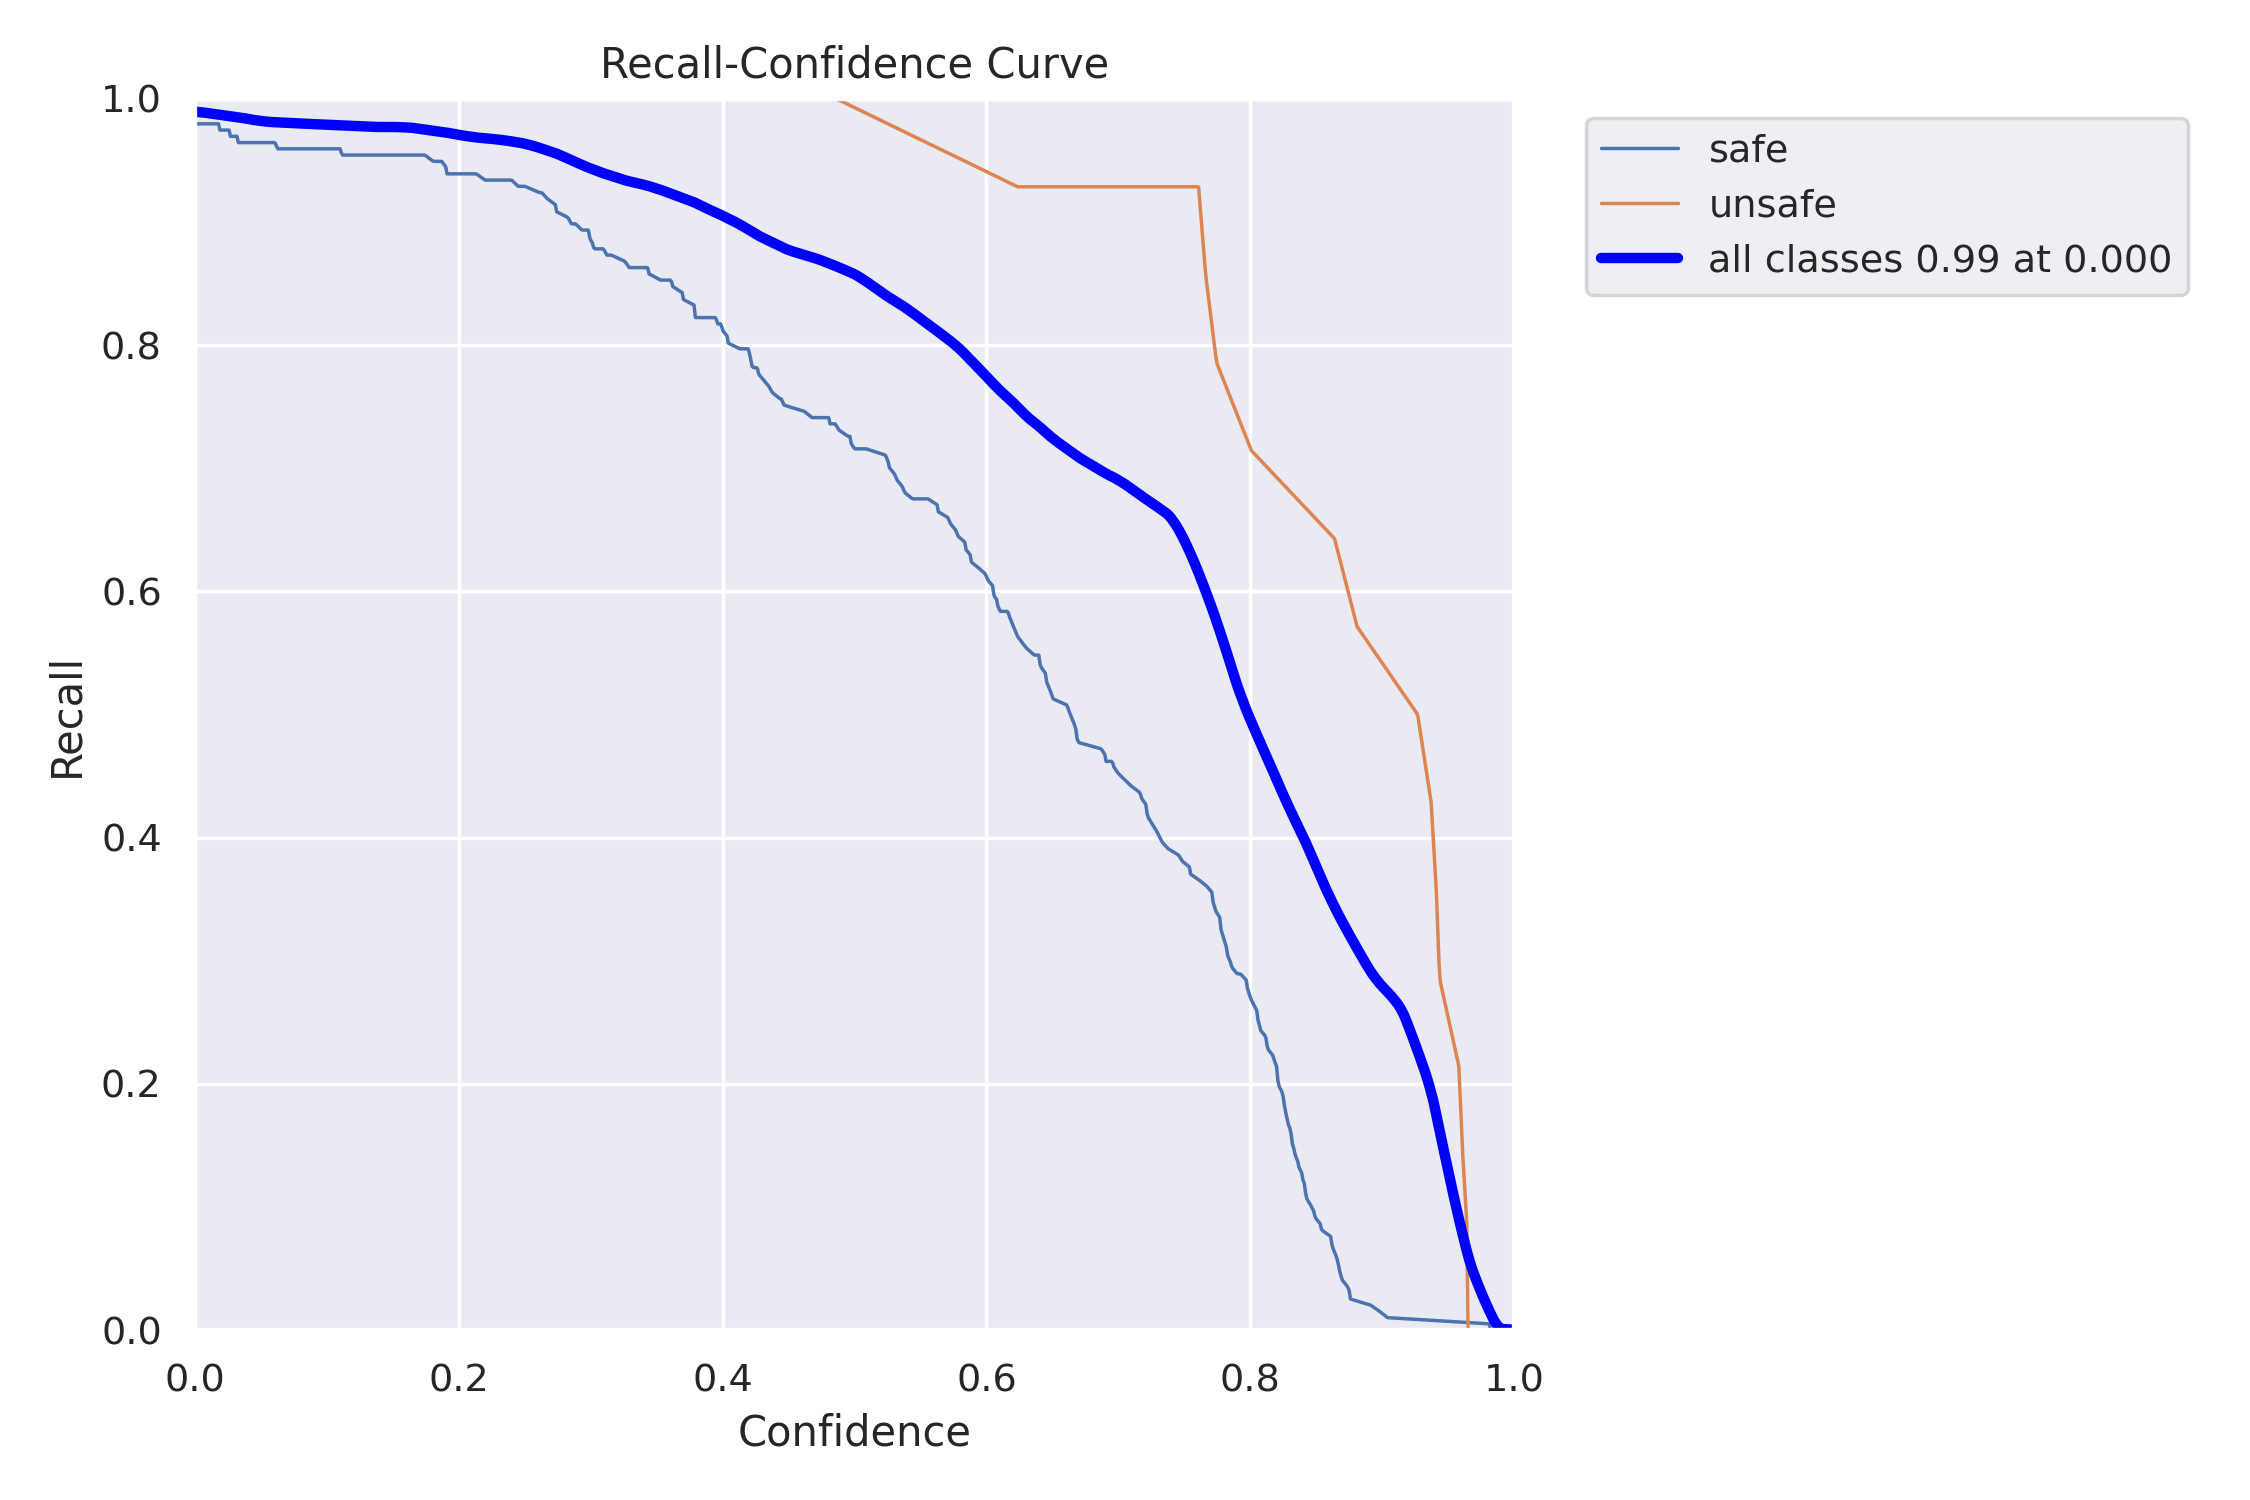

In [20]:
#R-CURVE
Image(filename=f'{HOME}/runs/detect/train/R_curve.png', width=600)

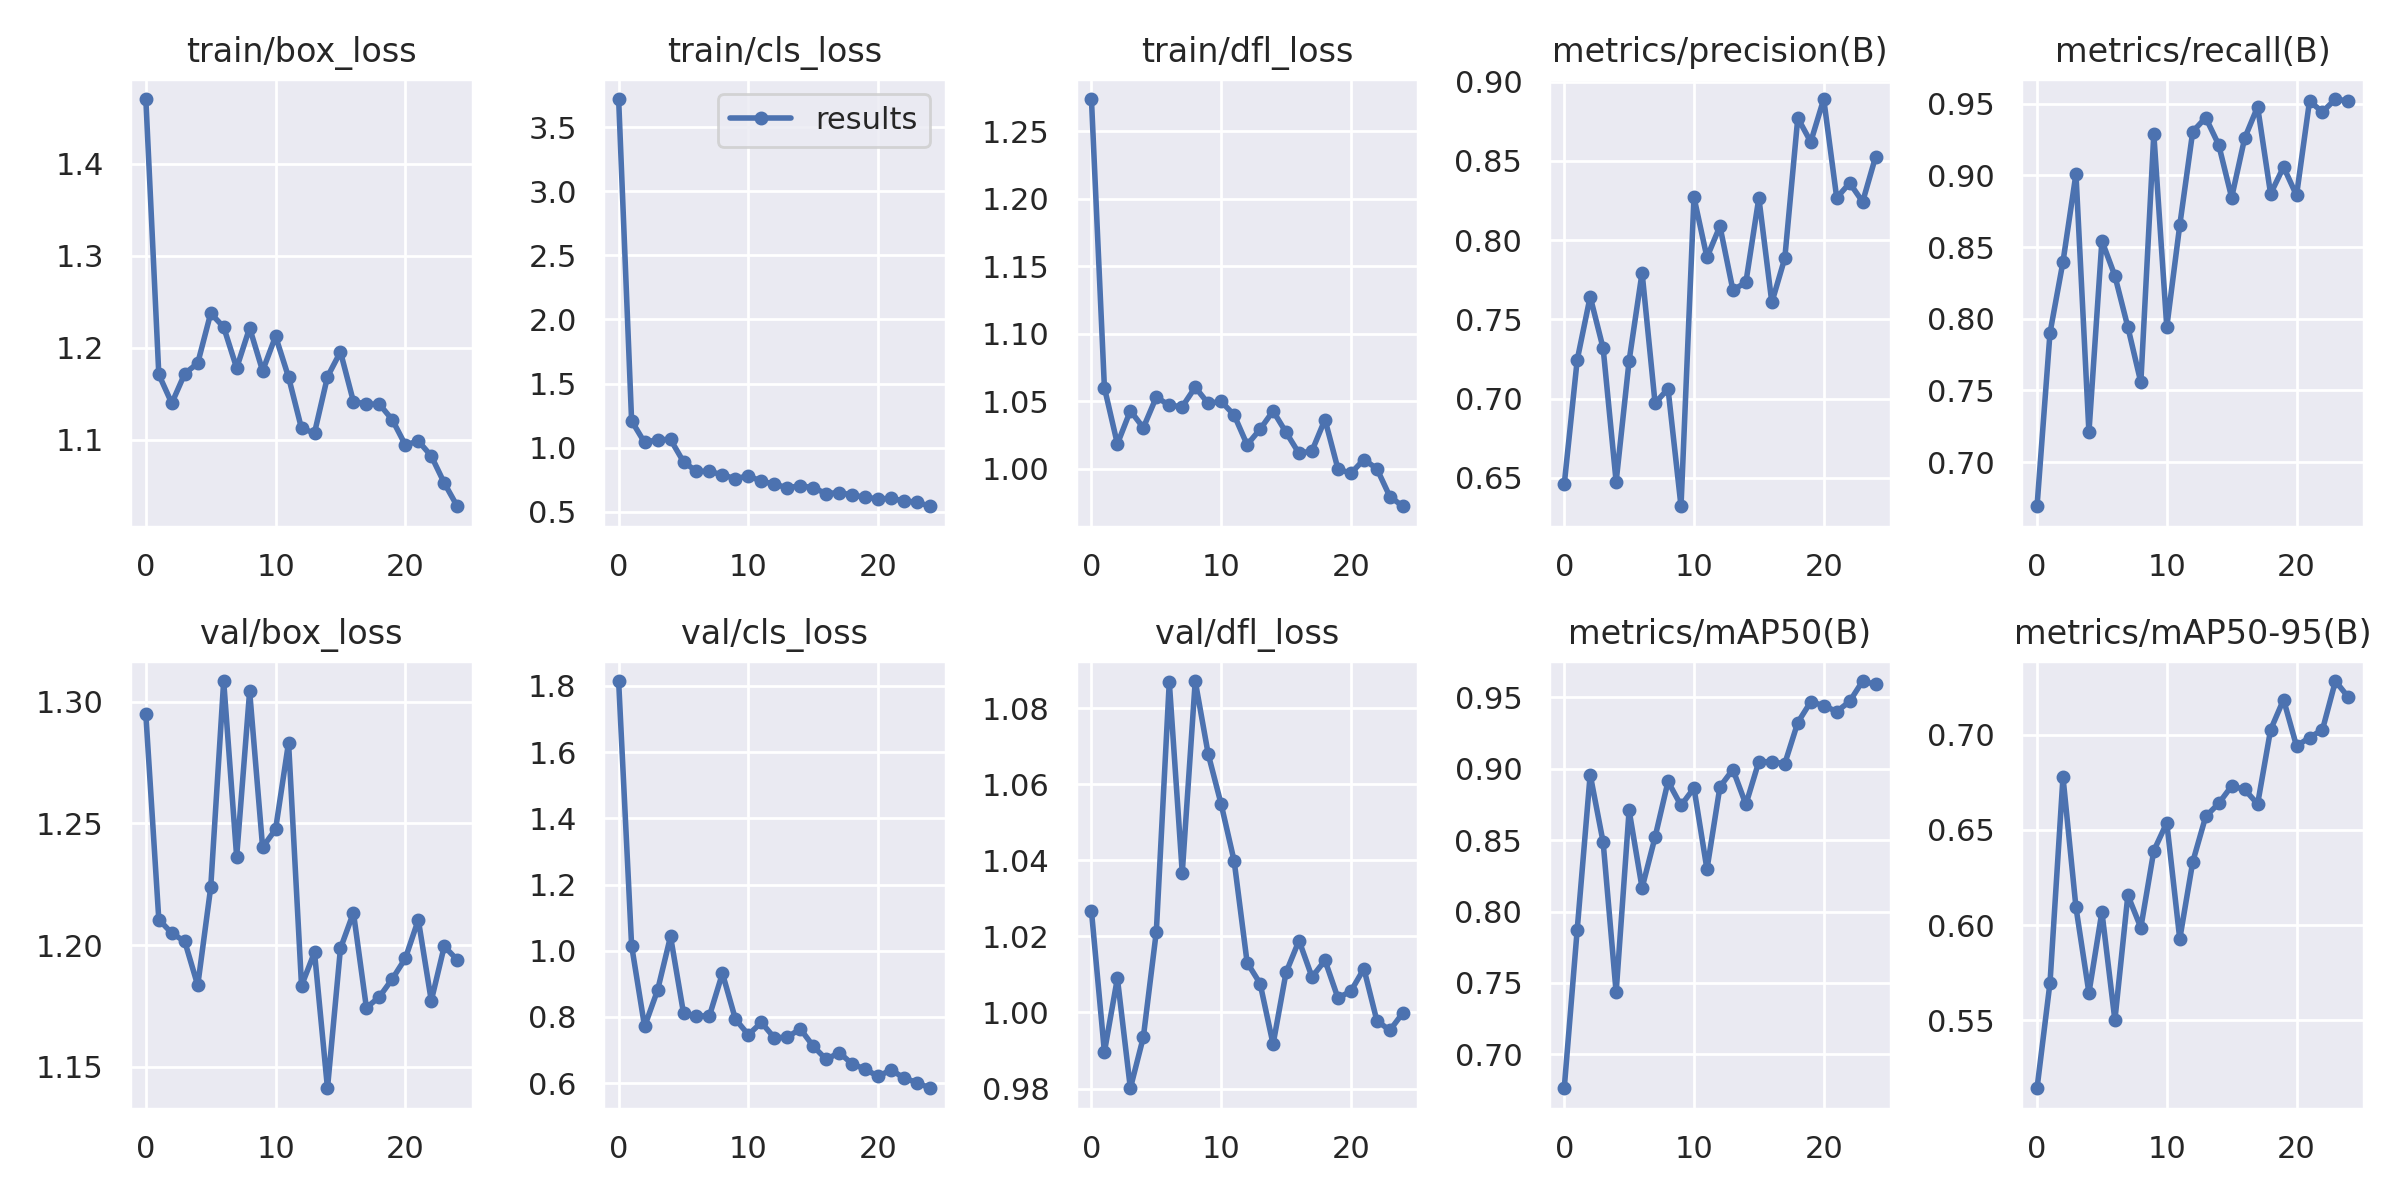

In [21]:
#RESULTS
Image(filename=f'runs/detect/train/results.png', width=600)

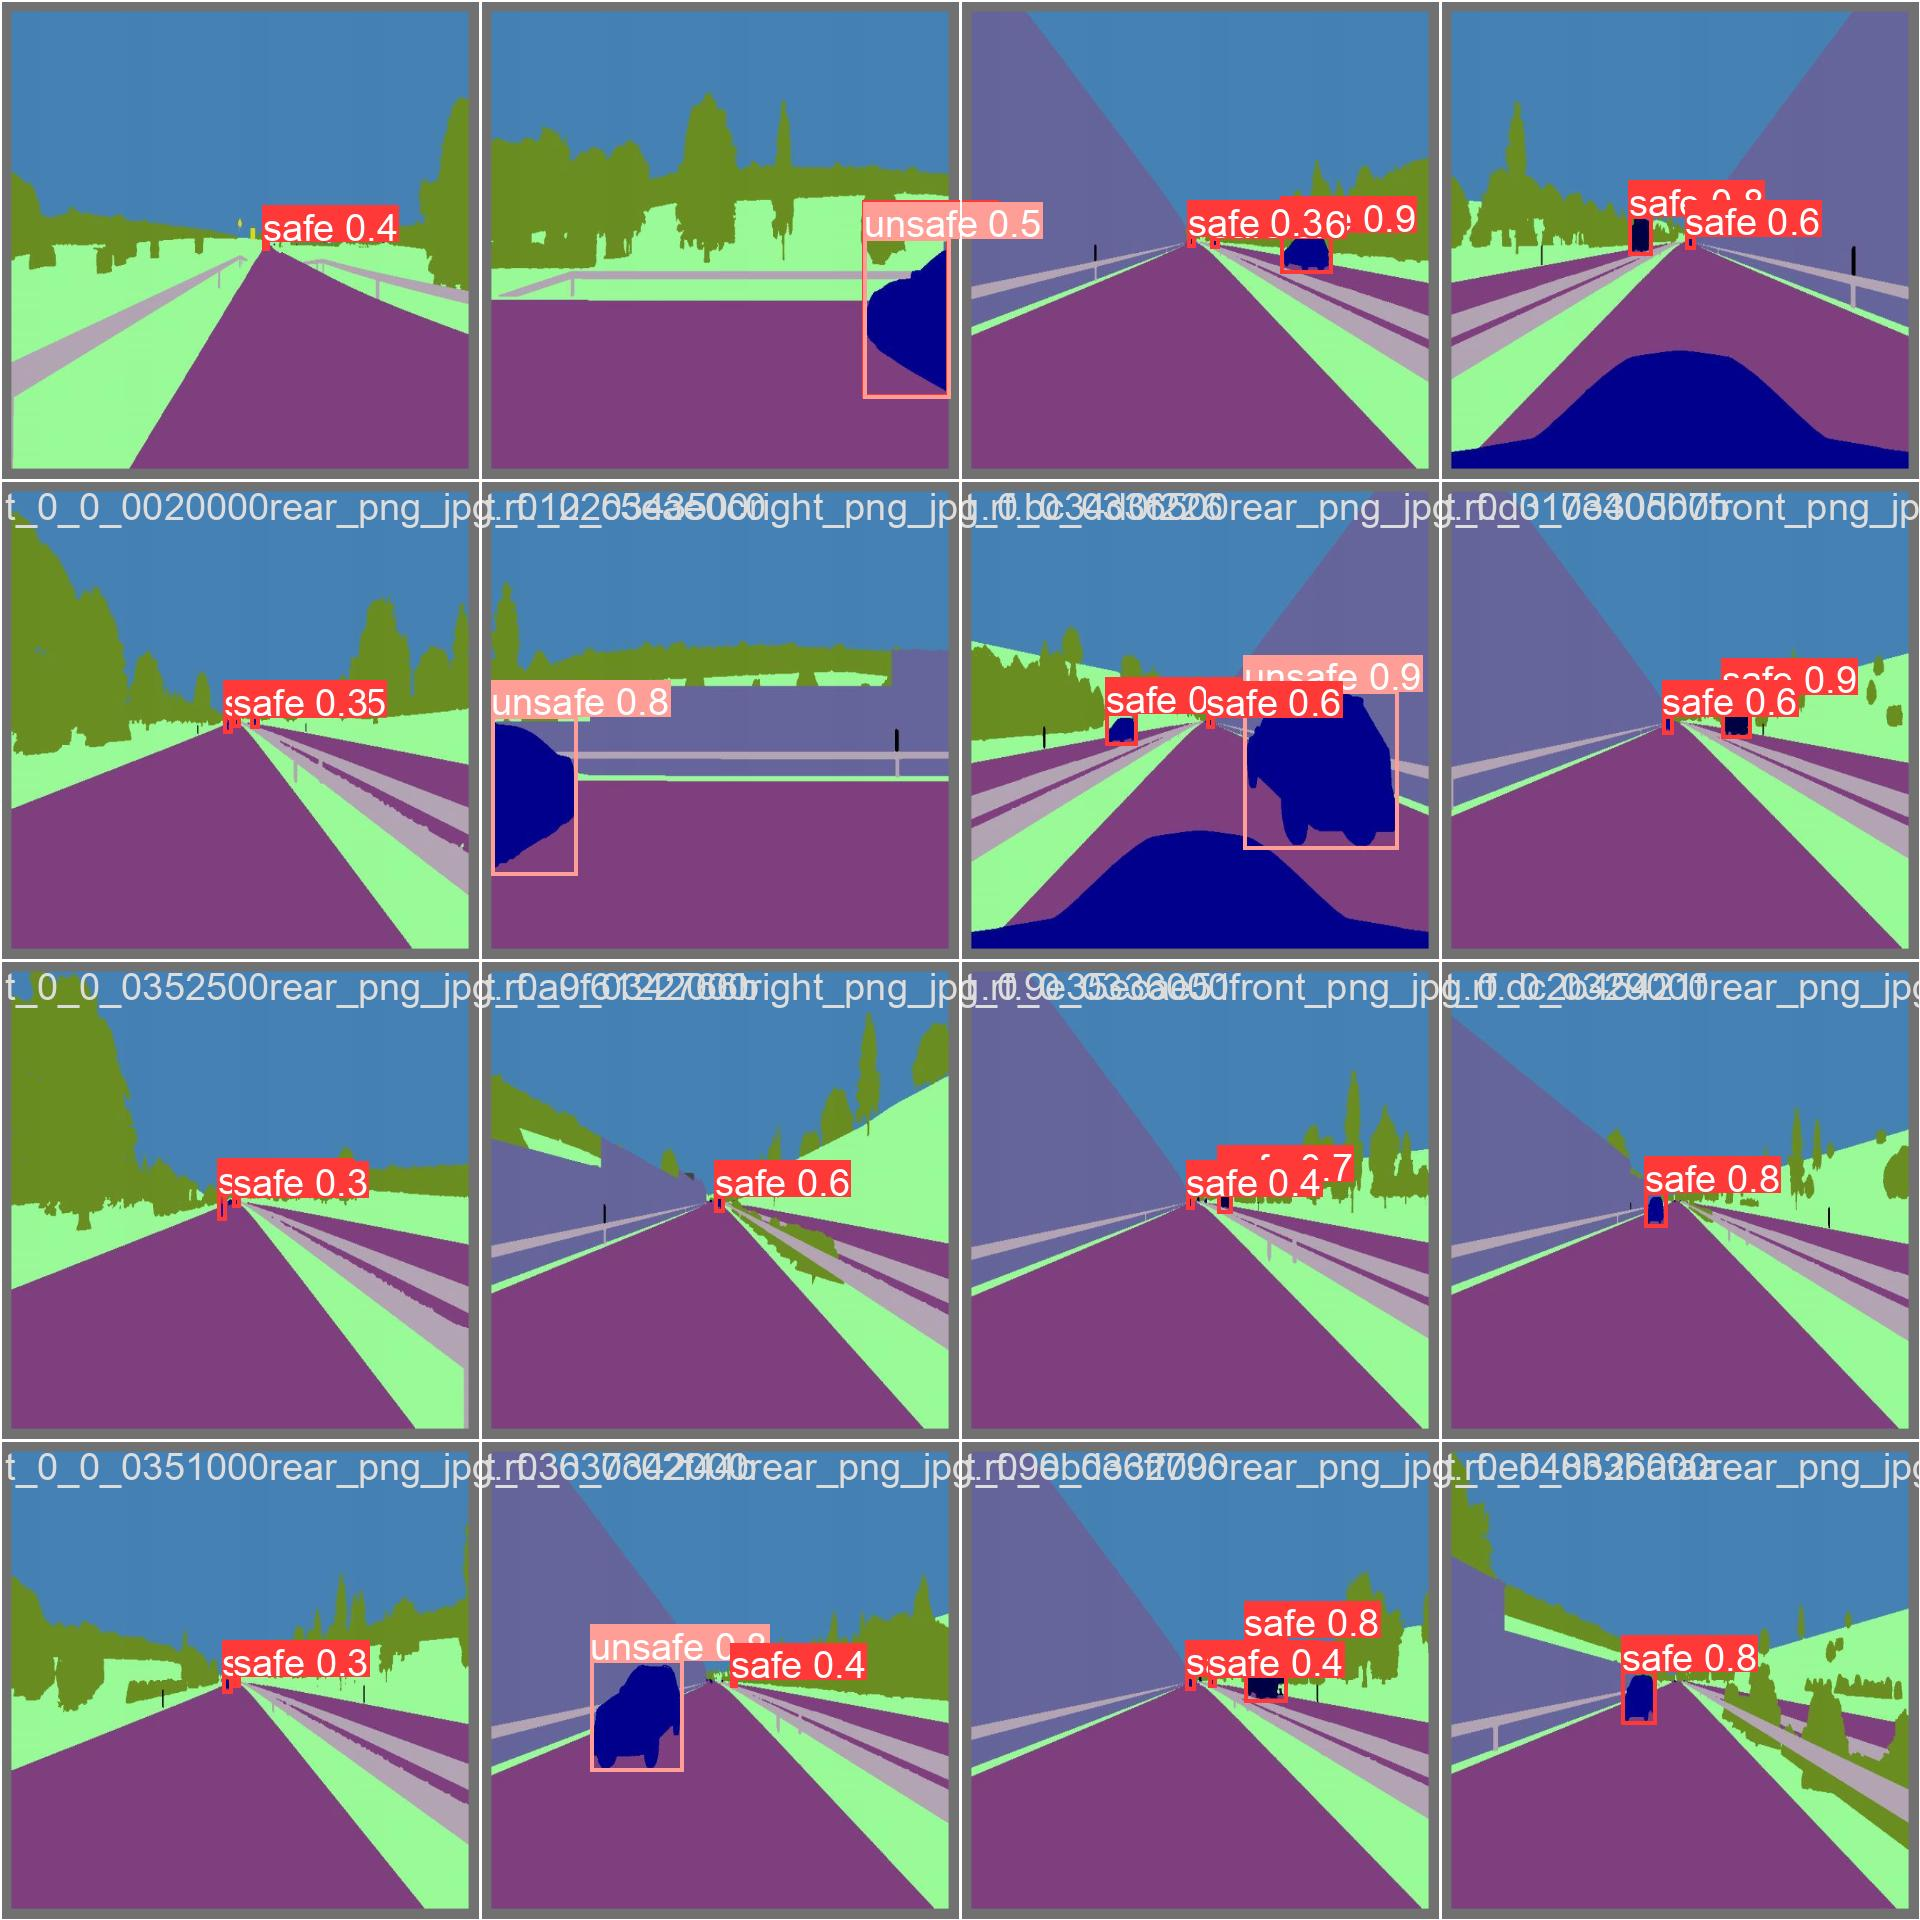

In [22]:
#SAMPLE-IMAGES
Image(filename=f'runs/detect/train/val_batch0_pred.jpg', width=600)

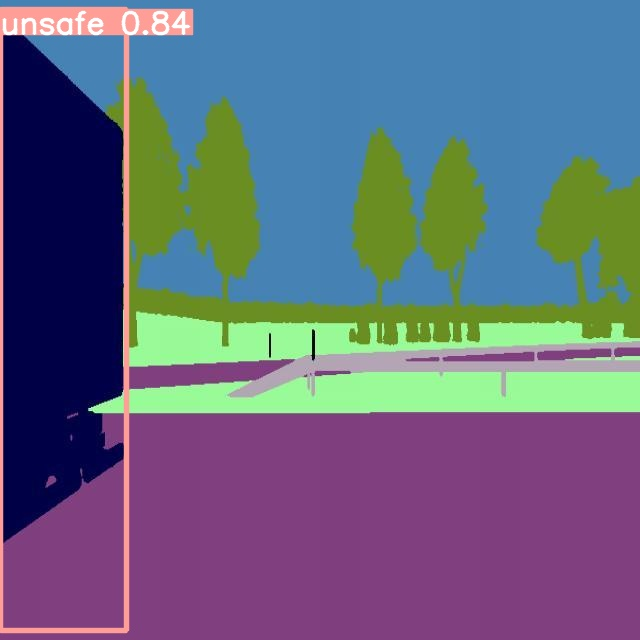

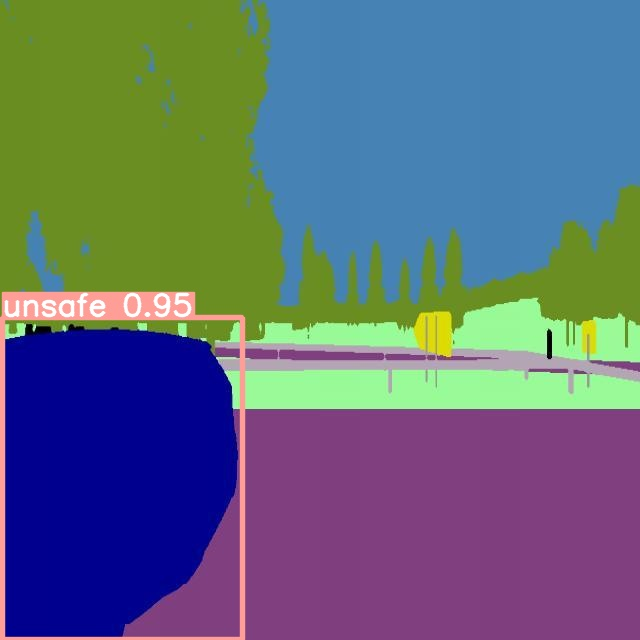

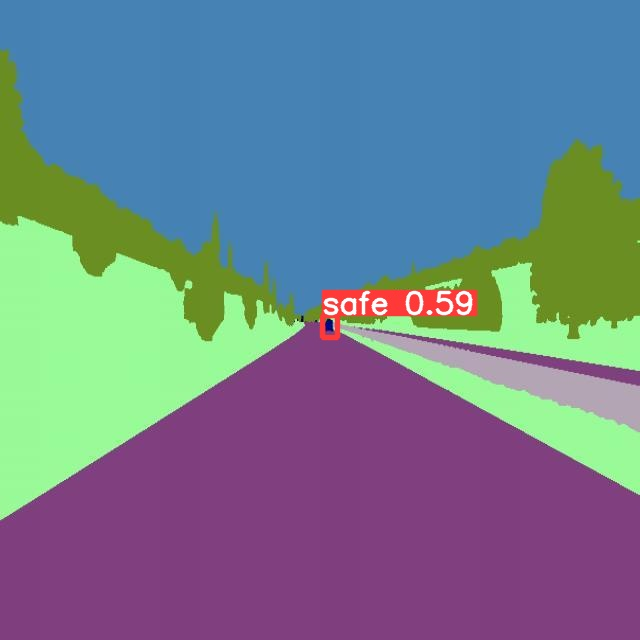

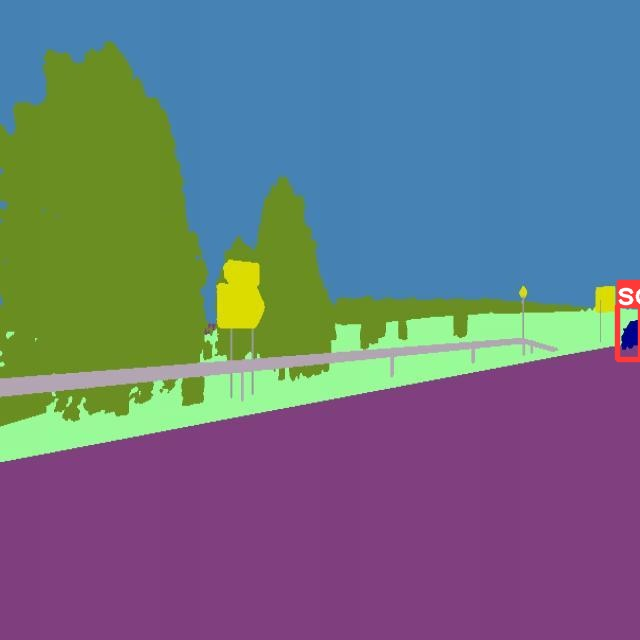

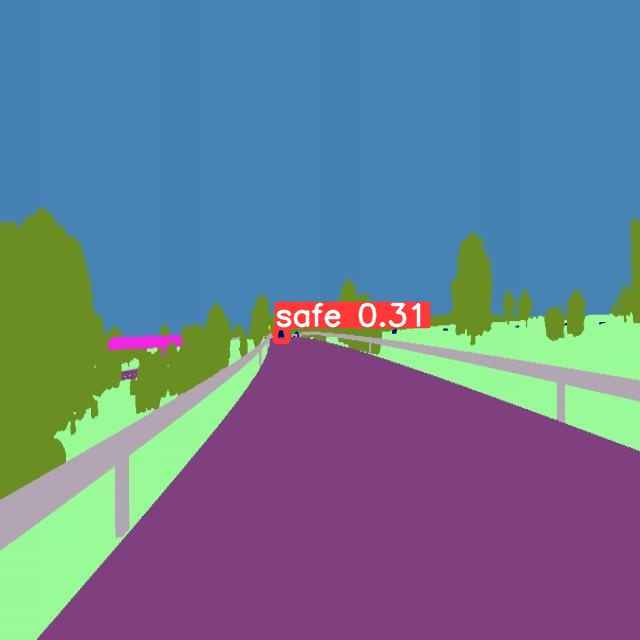

In [23]:
#SAMPLE-PREDICTIONS
for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:5]:
      display(Image(filename=image_path))
      print("\n")

In [24]:
import ultralytics
ultralytics.checks()
from ultralytics import YOLO
model = YOLO("runs/detect/train/weights/best.pt")

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.3/78.2 GB disk)


In [26]:
import cv2

#Change 'fr' to change playback speed. Lower fr -> Greater playback speed
fr=50

# Open video file using OpenCV
video_path = '/content/drive/MyDrive/Major_Project/short_front.mp4'
cap = cv2.VideoCapture(video_path)

i=0

# Define alert function to display a message when "unsafe" is detected
def show_alert(i):
    print("ALERT{0}!!!INCOMING VEHICLE".format(int(i)))

# Loop over frames in the video
while cap.isOpened():
    # Read next frame from video
    ret, frame = cap.read()
    if not ret:
        break

    # Perform object detection inference on frame using the trained YOLOv8 model
    response = model.predict(source=frame, classes=[1], conf=0.8, show=True)

    if response[0].boxes.cls.shape[0] > 0:
        show_alert(i)
        i=i+1
    else:
        print("SAFE")

    cv2.waitKey(fr)

    if cv2.waitKey(fr) & 0xFF == ord('q'):
        break


# Release video capture and close window
cap.release()

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
